# Load in Commutes

In [201]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [202]:
commutes = pd.read_csv("../data/NYC_sample_10000.csv")
del commutes['Unnamed: 0']

In [203]:
commutes.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate,origin_lat,origin_lon,origin_county,dest_lat,dest_lon,dest_county,linestring
0,360470966002008,360470405001007,1,0,0,1,0,1,0,0,0,1,20170919,40.681303,-73.906141,"Kings County, NY",40.641465,-73.900345,"Kings County, NY","LINESTRING(-73.9061405 40.6813029, -73.9003452..."
1,360471098002015,360470286005000,1,0,1,0,0,0,1,0,0,1,20170919,40.601941,-74.000420,"Kings County, NY",40.647682,-73.904344,"Kings County, NY","LINESTRING(-74.0004199 40.601940899999995, -73..."
2,360594073011115,360595189006014,1,0,0,1,1,0,0,0,0,1,20170919,40.764904,-73.530572,"Nassau County, NY",40.731259,-73.608675,"Nassau County, NY","LINESTRING(-73.53057170000001 40.7649044, -73...."
3,360610116001004,360594168021003,1,1,0,0,0,0,1,0,0,1,20170919,40.583330,-73.645222,"Nassau County, NY",40.764454,-73.956971,"New York County, NY","LINESTRING(-73.6452218 40.583329799999994, -73..."
4,360610112011003,360470518002003,1,0,1,0,0,0,1,0,0,1,20170919,40.637790,-73.960386,"Kings County, NY",40.763308,-73.975828,"New York County, NY","LINESTRING(-73.960386 40.6377898, -73.97582840..."


# Select work locations

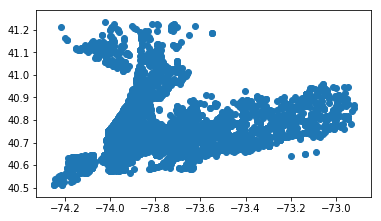

In [204]:
work_locations = commutes.copy()
geometry = [Point(xy) for xy in zip(work_locations.dest_lon, work_locations.dest_lat)]
crs = {'init': 'epsg:4326'}
work_locations = gpd.GeoDataFrame(work_locations, crs=crs, geometry=geometry)
work_locations.reset_index(inplace=True, drop=True)
work_locations.plot();

# Select home locations

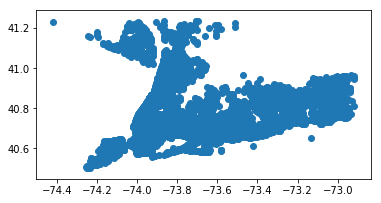

In [205]:
home_locations = commutes.copy()
geometry = [Point(xy) for xy in zip(home_locations.origin_lon, home_locations.origin_lat)]
crs = {'init': 'epsg:4326'}
home_locations = gpd.GeoDataFrame(home_locations, crs=crs, geometry=geometry)
home_locations.reset_index(inplace=True, drop=True)
home_locations.plot();

# Load in languages by census tract

In [206]:
languages = gpd.read_file("../data/nyc_census_tracts_language")

In [207]:
languages.columns = ['GEOID', 'Speak only English', 'Spanish',
       'French, Haitian, or Cajun', 'German or other West Germanic languages',
       'Russian, Polish, or other Slavic languages',
       'Other Indo-European languages', 'Korean',
       'Chinese (incl. Mandarin, Cantonese)', 'Vietnamese',
       'Tagalog (incl. Filipino)', 'Other Asian and Pacific Island languages',
       'Arabic', 'Other and unspecified languages', 'geometry']

In [208]:
languages.head()

,GEOID,Speak only English,Spanish,"French, Haitian, or Cajun",German or other West Germanic languages,"Russian, Polish, or other Slavic languages",Other Indo-European languages,Korean,"Chinese (incl. Mandarin, Cantonese)",Vietnamese,Tagalog (incl. Filipino),Other Asian and Pacific Island languages,Arabic,Other and unspecified languages,geometry
0,36005000100,0.718779,0.246968,0.006131,0.000933,0.007997,0.009729,0.000000,0.005198,0.000000,0.0,0.000000,0.0,0.004265,(POLYGON ((-73.87097274671088 40.7890576123909...
1,36005000200,0.335965,0.619226,0.000000,0.000000,0.000000,0.017173,0.005527,0.000000,0.000000,0.0,0.000000,0.0,0.022108,"(POLYGON ((-73.865218 40.814529, -73.864255 40..."
2,36005000400,0.459013,0.493612,0.023598,0.000000,0.000000,0.002129,0.000355,0.000000,0.002307,0.0,0.001419,0.0,0.017566,"(POLYGON ((-73.85870299999999 40.815405, -73.8..."
3,36005001600,0.323069,0.548302,0.024459,0.000000,0.001408,0.001408,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.101355,"POLYGON ((-73.862464 40.819247, -73.861531 40...."
4,36005001900,0.458385,0.464535,0.024190,0.005740,0.001230,0.023370,0.000000,0.004100,0.002050,0.0,0.010660,0.0,0.005740,"(POLYGON ((-73.930938 40.808253, -73.929219 40..."


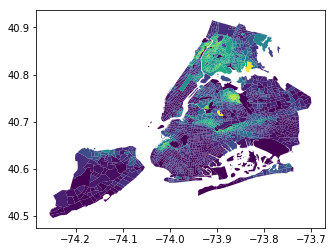

In [209]:
languages.plot(column='Spanish');

# Join Work locations to language

In [210]:
work_locations = gpd.sjoin(work_locations, languages, how="inner", op='intersects')

In [211]:
work_locations.rename(columns={'geometry':'work_geometry'}, inplace=True)

In [212]:
work_locations = work_locations[['dest_lat', 'dest_lon', 'Speak only English',
       'Spanish', 'French, Haitian, or Cajun',
       'German or other West Germanic languages',
       'Russian, Polish, or other Slavic languages',
       'Other Indo-European languages', 'Korean',
       'Chinese (incl. Mandarin, Cantonese)', 'Vietnamese',
       'Tagalog (incl. Filipino)', 'Other Asian and Pacific Island languages',
       'Arabic', 'Other and unspecified languages']]

In [213]:
work_locations.columns = ['dest_lat', 'dest_lon', 'work_English', 'work_Spanish', 'work_French', 'work_German',
                         'work_Russian', 'work_Other_Euro', 'work_Korean', 'work_Chinese', 'work_Vietnamese',
                         'work_Tagalog', 'work_Other_Asian', 'work_Arabic', 'work_Other']

In [214]:
work_locations.reset_index(inplace=True, drop=True)

In [215]:
work_locations.head()

,dest_lat,dest_lon,work_English,work_Spanish,work_French,work_German,work_Russian,work_Other_Euro,work_Korean,work_Chinese,work_Vietnamese,work_Tagalog,work_Other_Asian,work_Arabic,work_Other
0,40.641465,-73.900345,0.693585,0.048004,0.179453,0.004038,0.000000,0.029161,0.0,0.018843,0.0,0.0,0.0,0.0,0.026918
1,40.647682,-73.904344,0.776751,0.089981,0.087549,0.000000,0.001459,0.011187,0.0,0.030642,0.0,0.0,0.0,0.0,0.002432
2,40.648145,-73.905411,0.776751,0.089981,0.087549,0.000000,0.001459,0.011187,0.0,0.030642,0.0,0.0,0.0,0.0,0.002432
3,40.647682,-73.904344,0.776751,0.089981,0.087549,0.000000,0.001459,0.011187,0.0,0.030642,0.0,0.0,0.0,0.0,0.002432
4,40.650458,-73.900700,0.776751,0.089981,0.087549,0.000000,0.001459,0.011187,0.0,0.030642,0.0,0.0,0.0,0.0,0.002432


# Join Home locations to language

In [216]:
home_locations = gpd.sjoin(home_locations, languages, how="inner", op='intersects')

In [217]:
home_locations.rename(columns={'geometry':'home_geometry'}, inplace=True)

In [218]:
home_locations = home_locations[['origin_lat', 'origin_lon', 'Speak only English',
       'Spanish', 'French, Haitian, or Cajun',
       'German or other West Germanic languages',
       'Russian, Polish, or other Slavic languages',
       'Other Indo-European languages', 'Korean',
       'Chinese (incl. Mandarin, Cantonese)', 'Vietnamese',
       'Tagalog (incl. Filipino)', 'Other Asian and Pacific Island languages',
       'Arabic', 'Other and unspecified languages']]

In [219]:
home_locations.columns = ['origin_lat', 'origin_lon', 'home_English', 'home_Spanish', 'home_French', 'home_German',
                         'home_Russian', 'home_Other_Euro', 'home_Korean', 'home_Chinese', 'home_Vietnamese',
                         'home_Tagalog', 'home_Other_Asian', 'home_Arabic', 'home_Other']

In [220]:
home_locations.reset_index(inplace=True, drop=True)

In [221]:
home_locations.head()

,origin_lat,origin_lon,home_English,home_Spanish,home_French,home_German,home_Russian,home_Other_Euro,home_Korean,home_Chinese,home_Vietnamese,home_Tagalog,home_Other_Asian,home_Arabic,home_Other
0,40.681303,-73.906141,0.433018,0.521651,0.011502,0.008796,0.000000,0.009472,0.0,0.004736,0.000000,0.006766,0.000677,0.000000,0.003383
1,40.681872,-73.906709,0.433018,0.521651,0.011502,0.008796,0.000000,0.009472,0.0,0.004736,0.000000,0.006766,0.000677,0.000000,0.003383
2,40.682304,-73.907447,0.433018,0.521651,0.011502,0.008796,0.000000,0.009472,0.0,0.004736,0.000000,0.006766,0.000677,0.000000,0.003383
3,40.601941,-74.000420,0.292580,0.110012,0.000000,0.006125,0.242167,0.155713,0.0,0.126266,0.002827,0.000000,0.004005,0.051355,0.008952
4,40.597810,-74.003293,0.292580,0.110012,0.000000,0.006125,0.242167,0.155713,0.0,0.126266,0.002827,0.000000,0.004005,0.051355,0.008952


# Combine work and home locations by language

In [233]:
commutes_by_language = pd.concat([home_locations, work_locations], axis=1)

In [234]:
commutes_by_language.head()

,origin_lat,origin_lon,home_English,home_Spanish,home_French,home_German,home_Russian,home_Other_Euro,home_Korean,home_Chinese,...,work_German,work_Russian,work_Other_Euro,work_Korean,work_Chinese,work_Vietnamese,work_Tagalog,work_Other_Asian,work_Arabic,work_Other
0,40.681303,-73.906141,0.433018,0.521651,0.011502,0.008796,0.000000,0.009472,0.0,0.004736,...,0.004038,0.000000,0.029161,0.0,0.018843,0.0,0.0,0.0,0.0,0.026918
1,40.681872,-73.906709,0.433018,0.521651,0.011502,0.008796,0.000000,0.009472,0.0,0.004736,...,0.000000,0.001459,0.011187,0.0,0.030642,0.0,0.0,0.0,0.0,0.002432
2,40.682304,-73.907447,0.433018,0.521651,0.011502,0.008796,0.000000,0.009472,0.0,0.004736,...,0.000000,0.001459,0.011187,0.0,0.030642,0.0,0.0,0.0,0.0,0.002432
3,40.601941,-74.000420,0.292580,0.110012,0.000000,0.006125,0.242167,0.155713,0.0,0.126266,...,0.000000,0.001459,0.011187,0.0,0.030642,0.0,0.0,0.0,0.0,0.002432
4,40.597810,-74.003293,0.292580,0.110012,0.000000,0.006125,0.242167,0.155713,0.0,0.126266,...,0.000000,0.001459,0.011187,0.0,0.030642,0.0,0.0,0.0,0.0,0.002432


In [235]:
%time
commutes_by_language['linestring'] = "LINESTRING(" + commutes_by_language['origin_lon'].astype(str) + " " + \
                    commutes_by_language['origin_lat'].astype(str) + ", " + \
                    commutes_by_language['dest_lon'].astype(str) + " " + \
                    commutes_by_language['dest_lat'].astype(str) + ")"

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


In [240]:
commutes_by_language.dropna(inplace=True)

In [243]:
commutes_by_language.to_csv("../output.csv")